# World Happiness Report Project

### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

### Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData


In [1]:
#lets import necessary library


import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodel.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#checking for the count of rows and columns 
df.shape

(158, 12)

In [4]:
#check columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
#checking for null values in the dataframe
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
#Checking for the duplicate values
df.duplicated(keep='last').value_counts()

False    158
dtype: int64

In [8]:
# statistics of the dataset
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## analyzing the data

<function matplotlib.pyplot.show(close=None, block=None)>

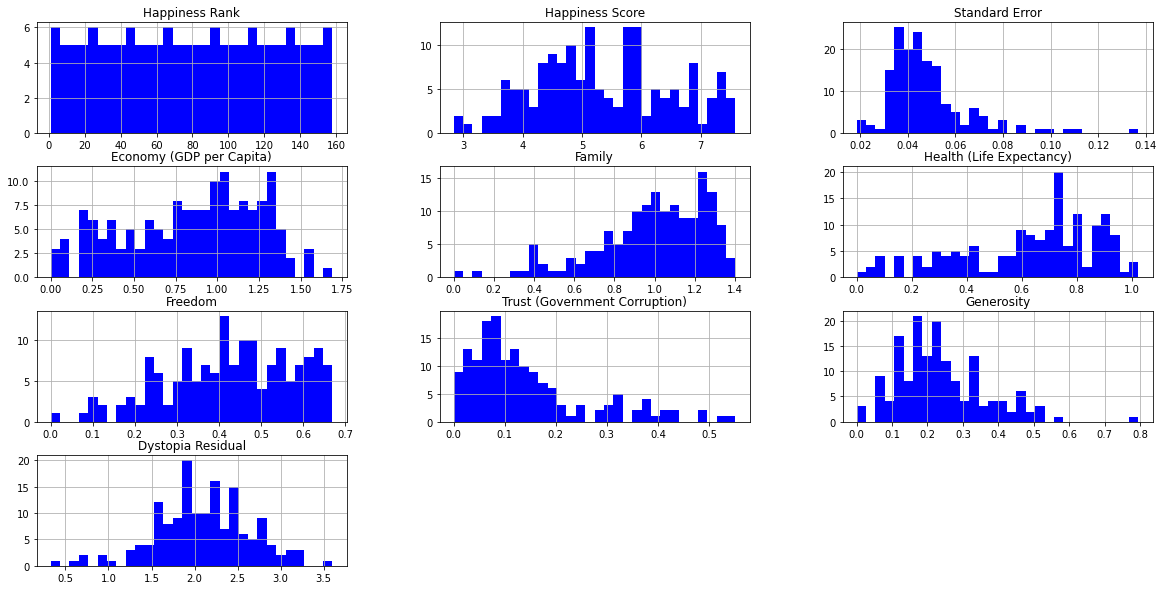

In [9]:
# analyzing the data
df.hist(color='b',figsize=(20,10),bins=30)
plt.show

# in this we see some data is scattered

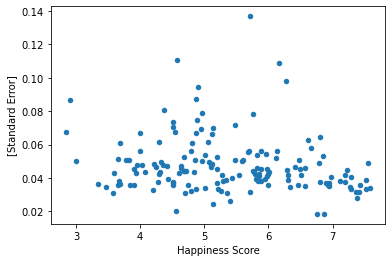

In [10]:
df.plot(x="Happiness Score", y=["Standard Error"],kind="scatter")
plt.show()
# we see some data is scattered (skewed) between happiness score vs Standard Error

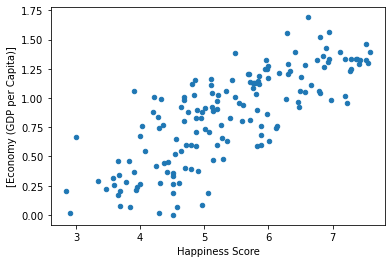

In [11]:
df.plot(x="Happiness Score", y=["Economy (GDP per Capita)"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Economy

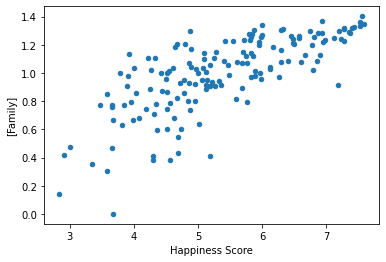

In [12]:
df.plot(x="Happiness Score", y=["Family"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Family

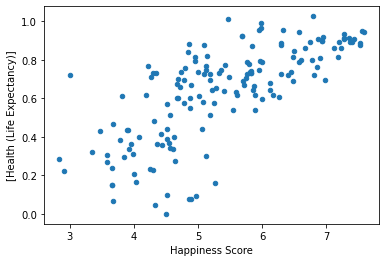

In [13]:
df.plot(x="Happiness Score", y=["Health (Life Expectancy)"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Health (Life Expectancy)

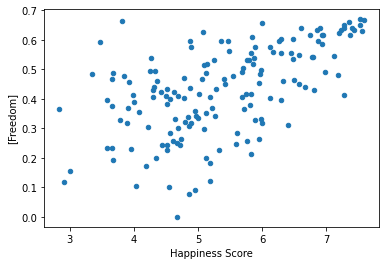

In [14]:
df.plot(x="Happiness Score", y=["Freedom"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Freedom

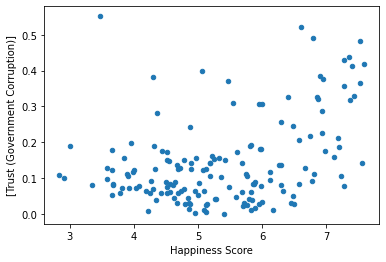

In [15]:
df.plot(x="Happiness Score", y=["Trust (Government Corruption)"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Trust (Government Corruption)

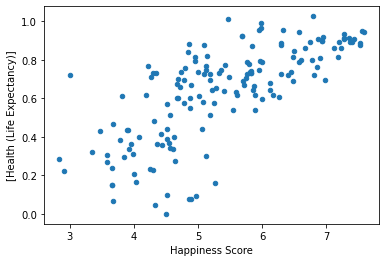

In [16]:
df.plot(x="Happiness Score", y=["Health (Life Expectancy)"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Health (Life Expectancy)

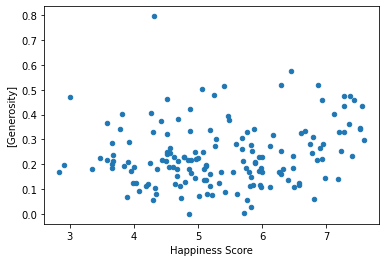

In [17]:
df.plot(x="Happiness Score", y=["Generosity"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Generosity 

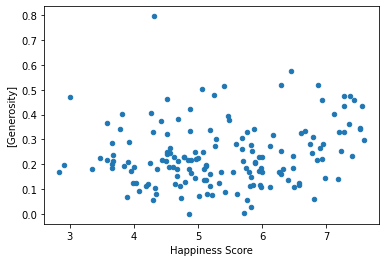

In [18]:
df.plot(x="Happiness Score", y=["Generosity"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Generosity 

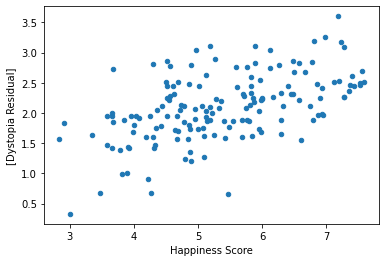

In [19]:
df.plot(x="Happiness Score", y=["Dystopia Residual"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Dystopia Residual 

In [20]:
#spliting the data into dependent variable and independent variable
X=df.drop(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score'],axis=1)
y=df['Happiness Score']

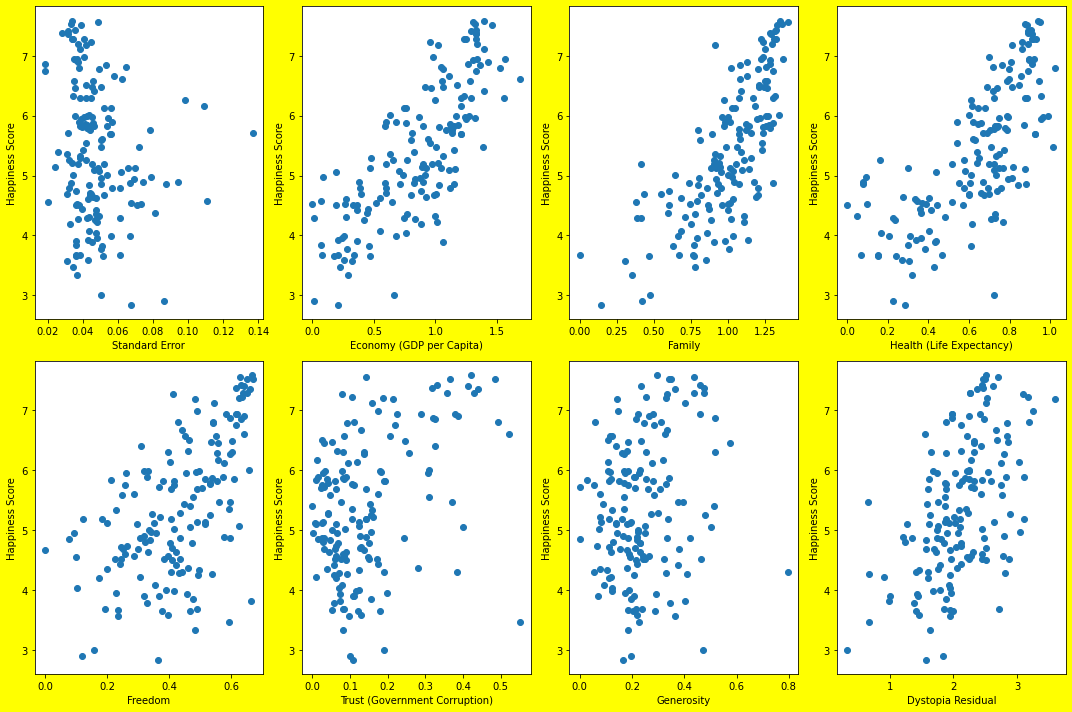

In [21]:
plt.figure(figsize = (15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [22]:
#skewness in terms of number
X.skew().sort_values(ascending=False)

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [23]:
#data scaling. Formula z=(x-mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [25]:
#split data into train and test. module will be build on training data and tested on the test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state= 348)
y_train.head()

48    5.960
76    5.286
90    5.057
44    5.995
56    5.828
Name: Happiness Score, dtype: float64

## Predict the accurate Happiness Score given feature

In [26]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
print("Accuracy=",regression.score(x_test,y_test)*100,"%")

Accuracy= 99.99999108713088 %


In [28]:
regression.score(x_train,y_train)

0.999999947764461

In [29]:
y_pred = regression.predict(x_test)

In [30]:
y_pred

array([5.1016631 , 4.94871984, 6.50508531, 4.29658638, 4.60973205,
       6.13016304, 6.26932363, 6.61125311, 7.36359446, 6.75010652,
       4.349954  , 4.51226439, 5.68871811, 5.07329917, 5.12418439,
       6.1228059 , 3.78083339, 4.71475623, 4.68556085, 4.87427172,
       6.29814201, 4.73856237, 4.97121087, 4.50731708, 7.11951918,
       7.28397391, 5.83266745, 5.77042824, 3.89651154, 5.94816148,
       3.34003366, 4.57148649, 4.87601087, 6.66968201, 5.47706614,
       5.47372907, 5.12894616, 4.78792152, 4.85752358, 4.51711513])

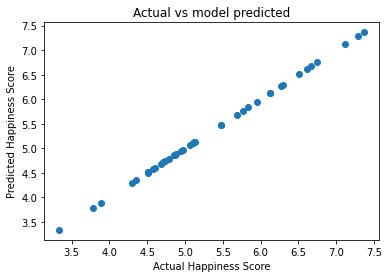

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs model predicted')
plt.show()

In [32]:
#Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
y_pred = regression.predict(x_test)

In [34]:
mean_absolute_error(y_test,y_pred)

0.00025176887286458837

In [35]:
mean_squared_error(y_test,y_pred)

8.504460932287173e-08

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002916240890647954

## Now we sucessfully created model and our score is great so we check it for overfitting 
### To check overfitting we have to use regularization technique

#### In regularization we have 3 type but we use only 2 

## LASSO MODEL

In [37]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 

In [38]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [39]:
alpha = lasscv.alpha_
alpha

8.913222125502969e-05

In [40]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.913222125502969e-05)

In [41]:
# now check r2 score

lasso_reg.score(x_test,y_test)

0.9999998854052671

## RIDGE MODEL

In [42]:
#Using Ridge Model

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [43]:
ridgecv.alpha_

0.001

In [44]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [45]:
# now check r2 score

ridge_model.score(x_test,y_test)

0.9999999113196936

In [46]:
training=regression.score(x_train,y_train)
testing=regression.score(x_test,y_test)

In [47]:
training

0.999999947764461

In [48]:
testing

0.9999999108713088

# as we see all are giving same result so out model is best model without overfitting

## Training Score for Linear Regression = 99.9999947764461%

## Testing Score for Linear Regression = 99.99999108713088%